In [97]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18  # You can adjust this value
import matplotlib

matplotlib.rcParams["mathtext.fontset"] = "stix"


matplotlib.rcParams["font.family"] = "STIXGeneral"



# Load the input data

input_data = pd.read_csv('../class_0/eVIG_dataset_urban_class_0_c1_a1_r1.csv', sep=",", header=None)

for i in range(1, 6):
    input_data += pd.read_csv(f'../class_{i}/eVIG_dataset_urban_class_{i}_c1_a1_r1.csv', sep=",", header=None)

# Create a directed graph
G = nx.DiGraph()
sort = sorted(input_data.values.flatten(), reverse=True)[:100]
# Add weighted edges from the input data to the graph
for i in range(input_data.shape[0]):
    for j in range(input_data.shape[1]):
        if input_data.values[i, j] in sort:
            G.add_edge(i, j, weight=input_data.values[i, j])

# Set the figure size
plt.figure(figsize=(10, 10), dpi=1000)
plt.margins(0)
# Set the node spacing
pos = nx.spring_layout(G, k=1.4)

# Set the font to a LaTeX font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Draw the graph with increased node spacing and LaTeX font
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='black', width=1, 
        edge_cmap=plt.cm.Blues, arrows=False, font_size=14)

# Add node labels according to the index
nx.relabel_nodes(G, {i: i for i in G.nodes})
plt.savefig("graph.png")
# Display the graph
plt.show()


c:\anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


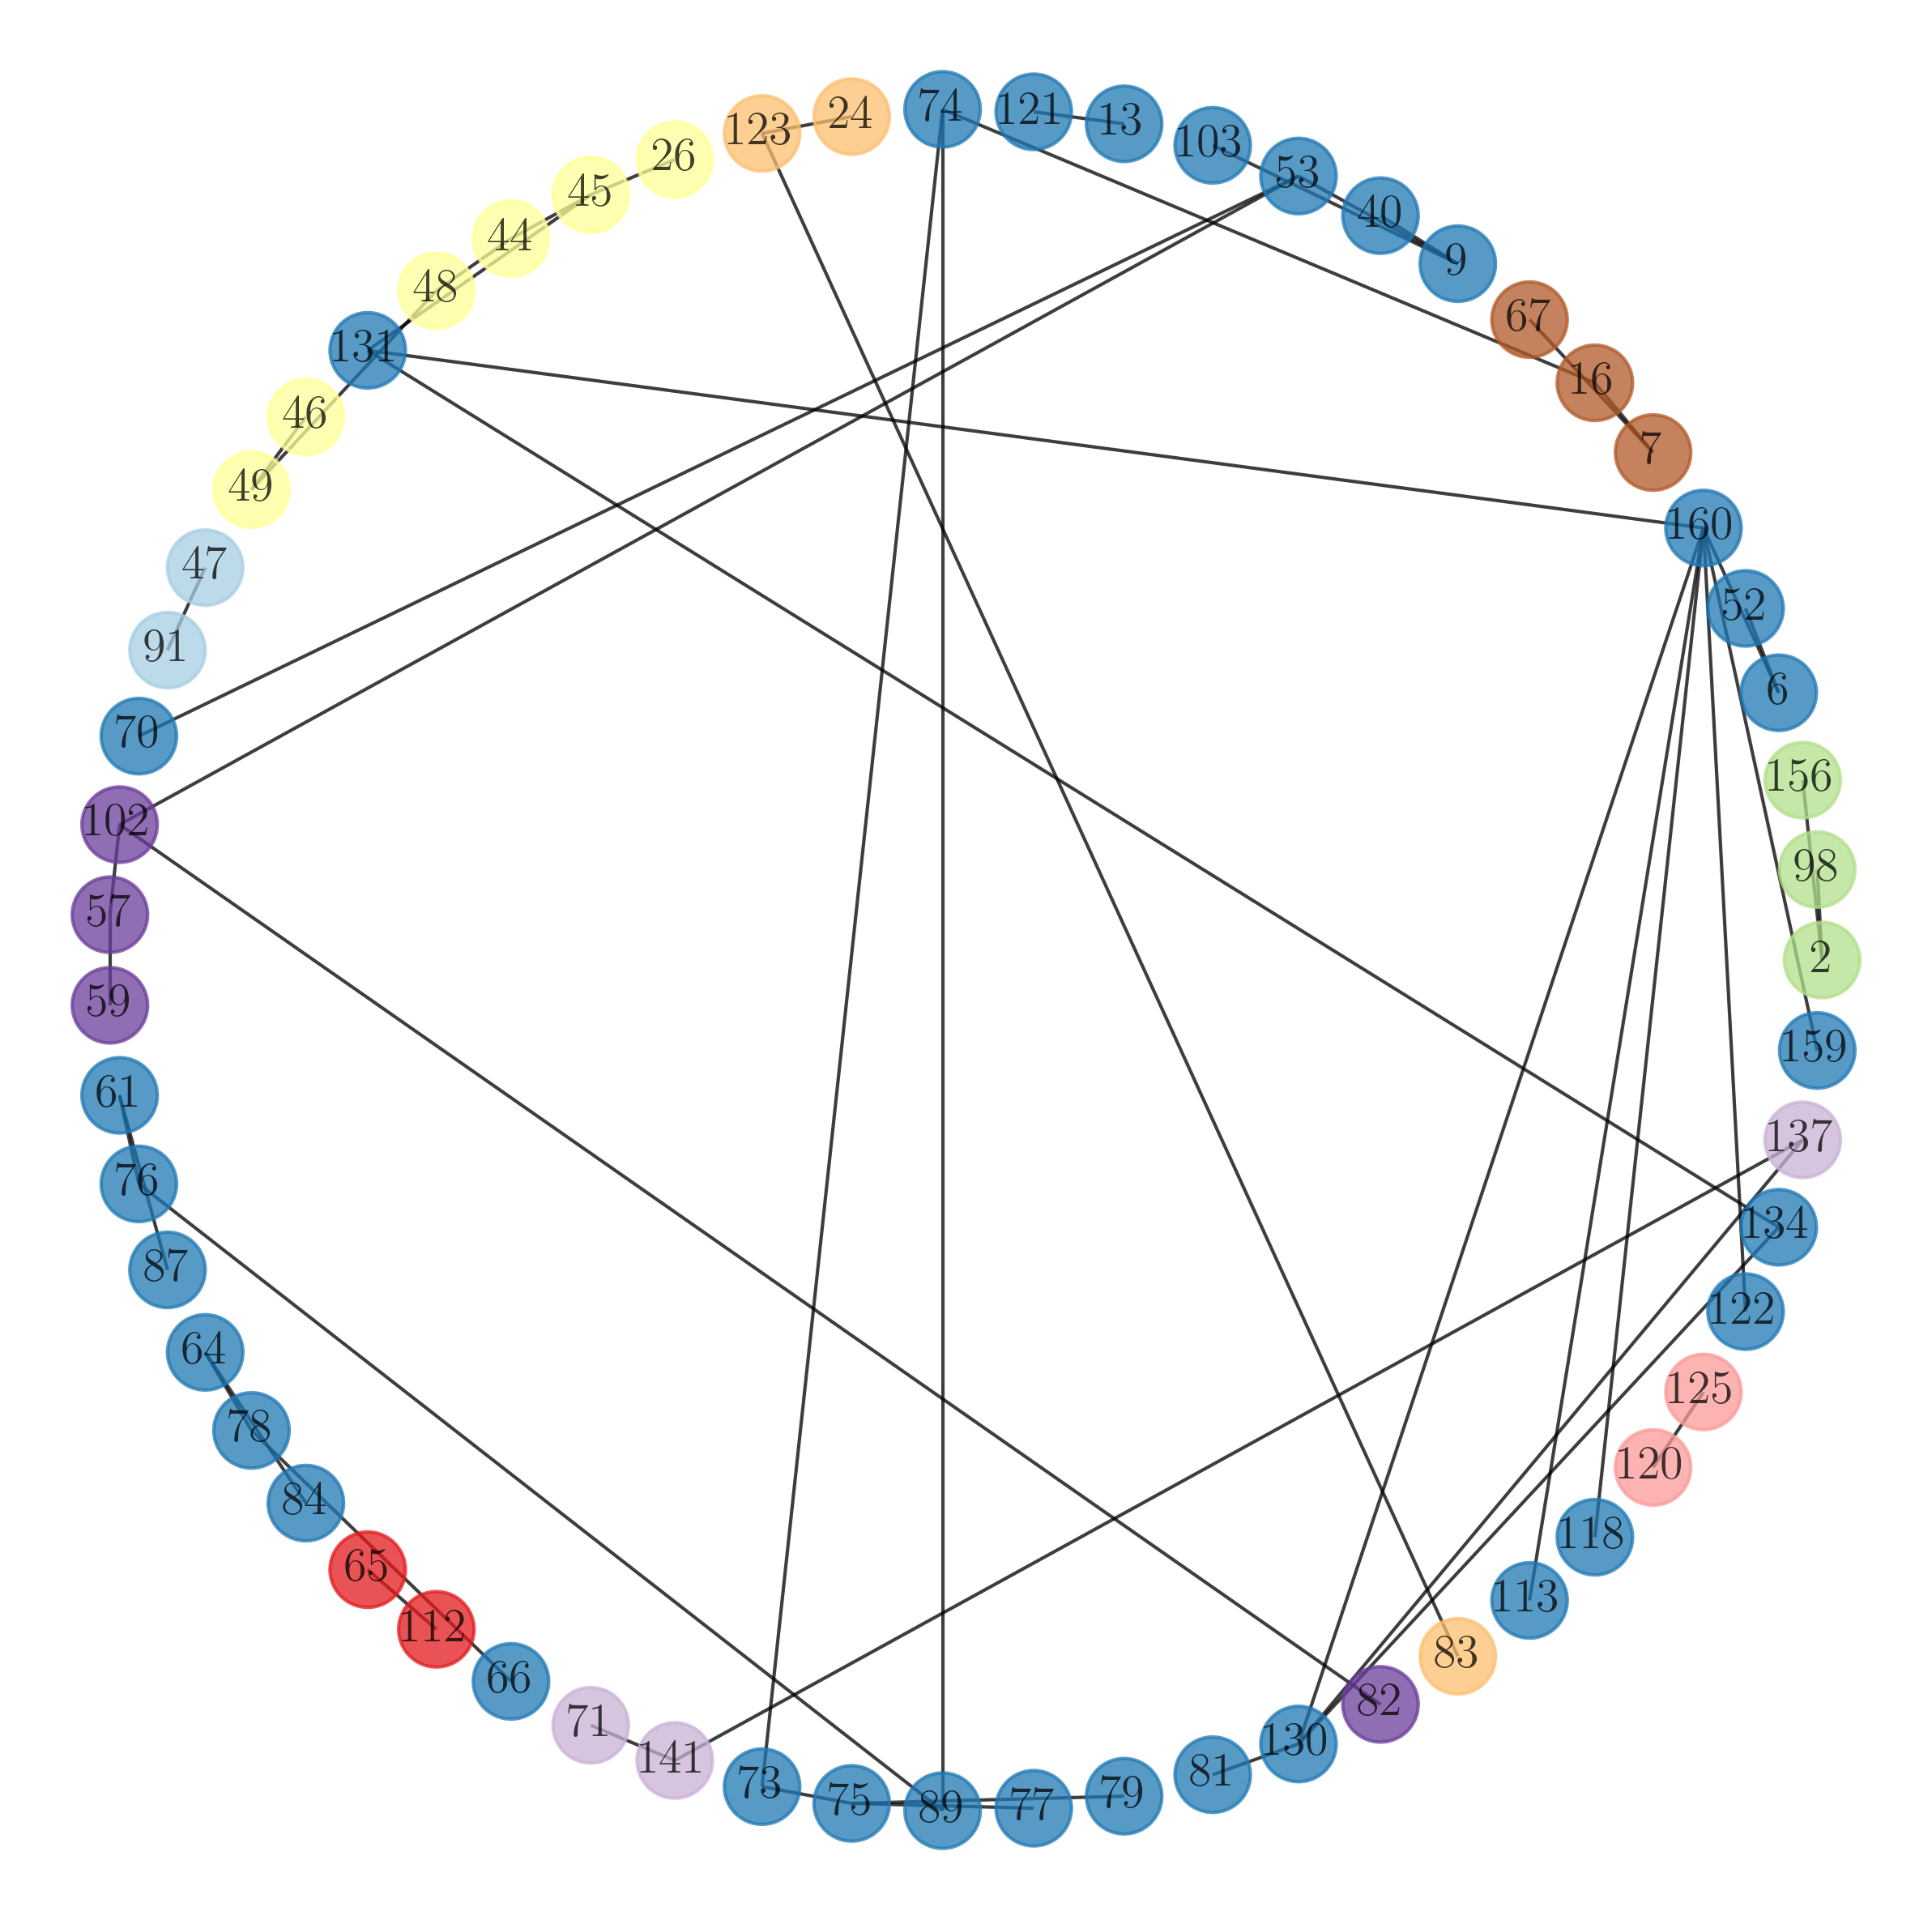

In [92]:
import pandas as pd
import networkx as nx
from sklearn.cluster import spectral_clustering
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18  # You can adjust this value

# Load the input data
input_data = pd.read_csv('../class_0/eVIG_dataset_urban_class_0_c1_a1_r1.csv', sep=",", header=None)

for i in range(1, 6):
    input_data += pd.read_csv(f'../class_{i}/eVIG_dataset_urban_class_{i}_c1_a1_r1.csv', sep=",", header=None)

# Create a graph
G = nx.Graph()
sort = sorted(input_data.values.flatten(), reverse=True)[:100]

# Add weighted edges from the input data to the graph
for i in range(input_data.shape[0]):
    for j in range(input_data.shape[1]):
        if input_data.values[i, j] in sort:
            G.add_edge(i, j, weight=input_data.values[i, j])

# Obtain the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).toarray()

# Perform spectral clustering
num_clusters = 10  # You can adjust the number of clusters as needed
labels = spectral_clustering(affinity=adjacency_matrix, n_clusters=num_clusters, random_state=0)

# Add cluster labels to nodes in the graph
for node, label in zip(G.nodes, labels):
    G.nodes[node]['cluster'] = label

# Draw the graph with cluster colors and Kamada-Kawai layout
pos = nx.circular_layout(G)  # Adjust the scale to make the circle smaller
node_colors = [G.nodes[node]['cluster'] for node in G.nodes]
edge_weights = [G[i][j]['weight'] for i, j in G.edges]

# Set the font to a LaTeX font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Adjust the figure size and margins
plt.figure(figsize=(10, 10), dpi=300)
plt.margins(0)

nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.Paired, node_size=500, with_labels=True, font_size=14, font_color='black', alpha=0.75)
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='black', alpha=1.0)
plt.savefig("graph_clustering.pdf", bbox_inches='tight')  # Save with tight bounding box
plt.show()


In [99]:
from reportlab.pdfgen import canvas
from PIL import Image

def convert_png_to_pdf(input_image_path, output_pdf_path):
    # Open the PNG image
    image = Image.open(input_image_path)

    # Get the dimensions of the image
    width, height = image.size

    # Create a PDF file
    pdf = canvas.Canvas(output_pdf_path, pagesize=(width, height))

    # Draw the image onto the PDF
    pdf.drawInlineImage(input_image_path, 0, 0, width, height)

    # Save the PDF file
    pdf.save()

if __name__ == "__main__":
    input_image_path = r"C:\Users\luktu\Downloads\gawll (1)\others\graph.png"
    output_pdf_path = r"C:\Users\luktu\Downloads\gawll (1)\others\graph.pdf"
    
    convert_png_to_pdf(input_image_path, output_pdf_path)
